In [1]:
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model
import pickle # saving and loading trained model
from os import path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip  install wget

You should consider upgrading via the 'g:\pycharm projects\machine learning\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
import wget
print('Downloading multi-label dataset.....')
data = wget.download('https://dl.dropboxusercontent.com/s/jhs8y2saukbds4y/multi_data.csv?dl=0')

100% [........................................................................] 46373836 / 46373836

In [ ]:
# https://dl.dropboxusercontent.com/s/jhs8y2saukbds4y/multi_data.csv?dl=0

## Loading Multi-label dataset

In [5]:
# bin_data = pd.read_csv('datasets/bin_data.csv')
# bin_data.drop(bin_data.columns[0],axis=1,inplace=True)
df = pd.read_csv(data)
df.drop(df.columns[0],axis=1,inplace=True)
le2_classes_ = ['Dos', 'Probe', 'R2L', 'U2R', 'normal']

In [6]:
df.shape

(125973, 100)

In [7]:
print('Multi-classification labels:')
le2_classes_

Multi-classification labels:


['Dos', 'Probe', 'R2L', 'U2R', 'normal']

<AxesSubplot:title={'center':'Continuous features'}>

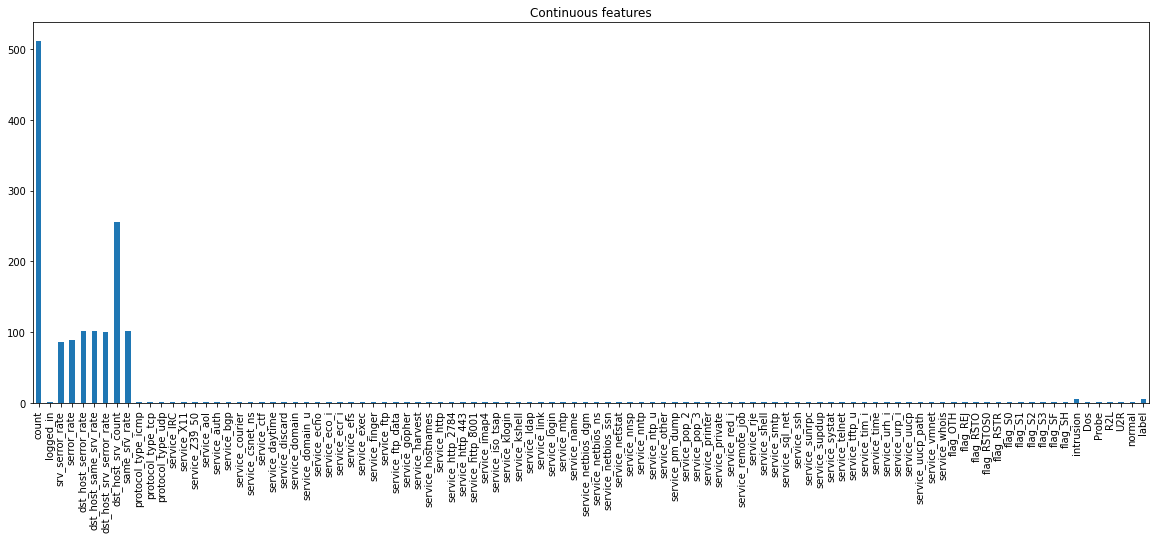

In [5]:
plt.title('Continuous features')
df.nunique().plot(kind='bar', figsize=(20,7))

In [6]:
# df.info()
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
df['label']= label_encoder.fit_transform(df['label'])

## Extracting Features and slpiting training, testing data

In [7]:
X = df[['count', 'srv_serror_rate', 'serror_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'logged_in', 'dst_host_same_srv_rate',
       'dst_host_srv_count', 'same_srv_rate']]
Y = df['label']

In [8]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [17]:
# function for evaluation metrics precision, recall, f1 etc
def modelEvaluation(predictions, y_test_set, model_name):
    import seaborn as sns
    from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
    from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score, f1_score
    # Print model evaluation to predicted result    
    print("==========",model_name,"==========")
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))    
    print ("\nClassification report : \n", classification_report(y_test_set, predictions))
#     print ("\nConfusion Matrix : \n", confusion_matrix(y_test_set, predictions))
    plt.rcParams.update({'font.size': 20})
    sns.heatmap(confusion_matrix(y_test_set, predictions),annot=True, fmt='g',cmap='viridis')
    plt.tight_layout()
    plt.show()
    results = [accuracy_score(y_test_set, predictions), precision_score(y_test_set, predictions, average='macro'),
              recall_score(y_test_set, predictions, average='macro'),f1_score(y_test_set, predictions, average='macro')]
    return results

### Generate Features from CNN

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Activation,Dropout 
from tensorflow.keras.layers import BatchNormalization 
from tensorflow.keras.utils import to_categorical

In [11]:
# deep learning model initialization
model = tf.keras.models.Sequential()  
model.add(Dense(1000,input_dim=X_train.shape[1],activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(75,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

RF_X_train = model.predict(X_train)
RF_X_test = model.predict(X_test)

In [12]:
RF_X_train

array([[0.        , 0.        , 0.05193594, ..., 0.        , 0.        ,
        0.        ],
       [0.00620747, 0.        , 0.02780487, ..., 0.        , 0.        ,
        0.        ],
       [0.008382  , 0.        , 0.03912964, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.01479144, ..., 0.        , 0.02359721,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

### DecisionTreeClassifier

In [13]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(RF_X_train,y_train) # training model on training dataset

DecisionTreeClassifier()

In [14]:
y_pred=dtc.predict(RF_X_test)  # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("Decision Tree-Classifier Bin-class Set-Accuracy is ", ac)

Decision Tree-Classifier Bin-class Set-Accuracy is  94.3957579221439


========== Decision Tree Classifier ==========

Accuracy on validation set: 0.9440

Classification report : 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     11421
           1       0.89      0.79      0.84      3313
           2       0.65      0.63      0.64       284
           3       0.00      0.00      0.00         6
           4       0.94      0.96      0.95     16470

    accuracy                           0.94     31494
   macro avg       0.69      0.67      0.68     31494
weighted avg       0.94      0.94      0.94     31494



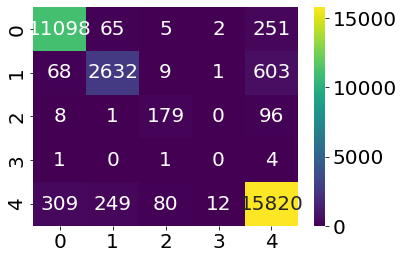

[0.943957579221439, 0.6911821190882825, 0.6713961759917118, 0.6806536762576866]

In [18]:
modelEvaluation(y_test, y_pred,'Decision Tree Classifier')

### KNeighborsClassifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(RF_X_train,y_train) # training model on training dataset
print('KNeighborsClassifier is trained')
y_pred=knn.predict(RF_X_test)  # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("KNN-Classifier Bin-class Set-Accuracy is ", ac)

KNeighborsClassifier is trained
KNN-Classifier Bin-class Set-Accuracy is  91.72858322220105


========== KNN Classifier ==========

Accuracy on validation set: 0.9440

Classification report : 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     11421
           1       0.89      0.79      0.84      3313
           2       0.65      0.63      0.64       284
           3       0.00      0.00      0.00         6
           4       0.94      0.96      0.95     16470

    accuracy                           0.94     31494
   macro avg       0.69      0.67      0.68     31494
weighted avg       0.94      0.94      0.94     31494



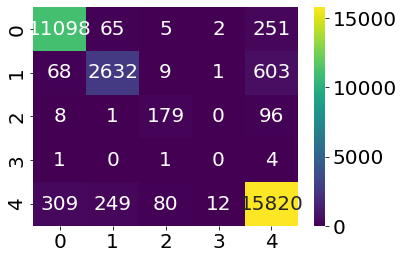

[0.943957579221439, 0.6911821190882825, 0.6713961759917118, 0.6806536762576866]

In [19]:
modelEvaluation(y_test, y_pred,'KNN Classifier')

### Multi-Layer Classification

In [19]:
# X1 = df.iloc[:,0:93]  # dataset excluding target attribute (encoded, one-hot-encoded,original)
# Y1 = df[['Dos','normal','Probe','R2L','U2R']] # target attributes

In [21]:
y_train

69124     0
20983     0
113664    0
110444    4
75941     4
         ..
119879    0
103694    0
860       0
15795     4
121958    4
Name: label, Length: 94479, dtype: int32

In [22]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
y_test_cat

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [23]:
from keras.models import Sequential
from keras.layers import Activation, Dense
mlp = Sequential() # initializing model
# input layer and first layer with 50 neurons
mlp.add(Dense(units=128, input_dim=RF_X_train.shape[1], activation='relu'))
mlp.add(Dense(units=64, activation='relu'))
# mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
# output layer with softmax activation
mlp.add(Dense(units=5,activation='softmax'))

In [24]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
# training the model on training dataset
history = mlp.fit(RF_X_train, y_train_cat, epochs=25, batch_size=64,validation_split=0.2)

Epoch 1/25
1181/1181 [==============================] - 3s 2ms/step - loss: 0.5336 - accuracy: 0.8058 - val_loss: 0.3897 - val_accuracy: 0.8566 ETA: 0s - loss: 0.5675 - ac
Epoch 2/25
1181/1181 [==============================] - 2s 2ms/step - loss: 0.3596 - accuracy: 0.8593 - val_loss: 0.3488 - val_accuracy: 0.872665
Epoch 3/25
1181/1181 [==============================] - 2s 1ms/step - loss: 0.3258 - accuracy: 0.8781 - val_loss: 0.3112 - val_accuracy: 0.8783 - loss: 0.3279 - accura
Epoch 4/25
1181/1181 [==============================] - 2s 2ms/step - loss: 0.2992 - accuracy: 0.8921 - val_loss: 0.2873 - val_accuracy: 0.8965
Epoch 5/25
1181/1181 [==============================] - 2s 2ms/step - loss: 0.2819 - accuracy: 0.8977 - val_loss: 0.2775 - val_accuracy: 0.8947
Epoch 6/25
1181/1181 [==============================] - 2s 1ms/step - loss: 0.2696 - accuracy: 0.9015 - val_loss: 0.2735 - val_accuracy: 0.8981oss: 0.2708 - accu
Epoch 7/25
1181/1181 [==============================] - 2s 1ms/s

In [25]:
pred = mlp.predict(RF_X_test)
result = []
for i in pred:
    r = np.argmax(i)
    result.append(r)

========== MLP ==========

Accuracy on validation set: 0.9180

Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     11024
           1       0.86      0.66      0.75      3812
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.93      0.94      0.93     16658

    accuracy                           0.92     31494
   macro avg       0.55      0.52      0.53     31494
weighted avg       0.92      0.92      0.92     31494



g:\pycharm projects\machine learning\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
g:\pycharm projects\machine learning\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
g:\pycharm projects\machine learning\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


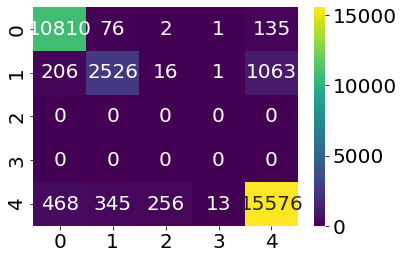

g:\pycharm projects\machine learning\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.9180161300565187,
 0.5454064901004541,
 0.5156556627343409,
 0.5279594149456516]

In [26]:
modelEvaluation(y_test, result,'MLP')

### Evaluation MLP

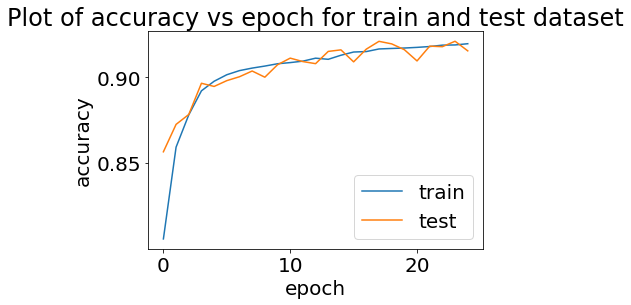

In [27]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
# plt.savefig('plots/mlp_multi_accuracy.png')
plt.show()

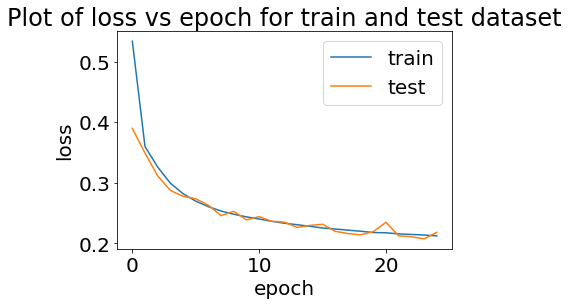

In [28]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
# plt.savefig('plots/mlp_multi_accuracy.png')
plt.show()

### Neural Network

In [29]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_dim=RF_X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [30]:
# compile the keras mode
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:

# fit the keras model on the dataset
history2 = model.fit(RF_X_train, y_train_cat, epochs=25, batch_size=100,validation_split=0.2)


Epoch 1/25
756/756 [==============================] - 1s 1ms/step - loss: 0.8847 - accuracy: 0.6989 - val_loss: 0.5714 - val_accuracy: 0.7993
Epoch 2/25
756/756 [==============================] - 1s 1ms/step - loss: 0.5283 - accuracy: 0.8018 - val_loss: 0.4999 - val_accuracy: 0.8183
Epoch 3/25
756/756 [==============================] - 1s 1ms/step - loss: 0.4844 - accuracy: 0.8271 - val_loss: 0.4662 - val_accuracy: 0.8407 loss: 0.4874 - accura
Epoch 4/25
756/756 [==============================] - 1s 1ms/step - loss: 0.4542 - accuracy: 0.8478 - val_loss: 0.4466 - val_accuracy: 0.8534: 0s - loss: 0.4623 
Epoch 5/25
756/756 [==============================] - 1s 2ms/step - loss: 0.4345 - accuracy: 0.8549 - val_loss: 0.4256 - val_accuracy: 0.8587
Epoch 6/25
756/756 [==============================] - 1s 1ms/step - loss: 0.4197 - accuracy: 0.8574 - val_loss: 0.4106 - val_accuracy: 0.85942 - accuracy: 0.
Epoch 7/25
756/756 [==============================] - 1s 1ms/step - loss: 0.4056 - accurac

### Evaluation on Neural Network

In [32]:
pred2 = model.predict(RF_X_test)
result2 = []
for i in pred2:
    r = np.argmax(i)
    result2.append(r)

========== Neural Network ==========

Accuracy on validation set: 0.8949

Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94     11308
           1       0.68      0.65      0.66      3054
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.92      0.90      0.91     17132

    accuracy                           0.89     31494
   macro avg       0.51      0.50      0.50     31494
weighted avg       0.90      0.89      0.90     31494



g:\pycharm projects\machine learning\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
g:\pycharm projects\machine learning\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
g:\pycharm projects\machine learning\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


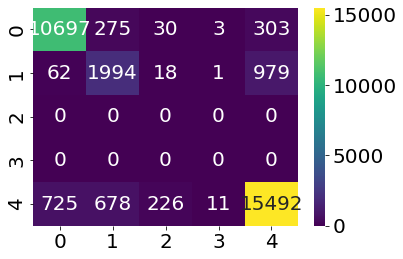

g:\pycharm projects\machine learning\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.8948688639105862, 0.506332471602205, 0.5006308747171996, 0.5034078317487447]

In [33]:
modelEvaluation(y_test, result2,'Neural Network')

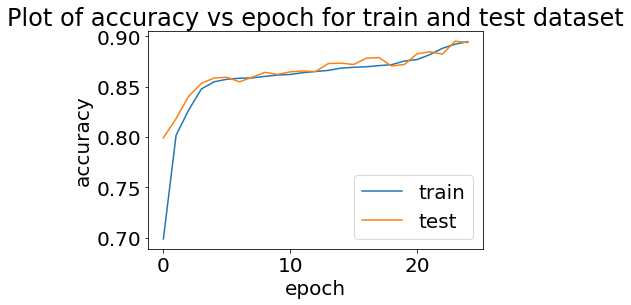

In [34]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
# plt.savefig('plots/mlp_multi_accuracy.png')
plt.show()

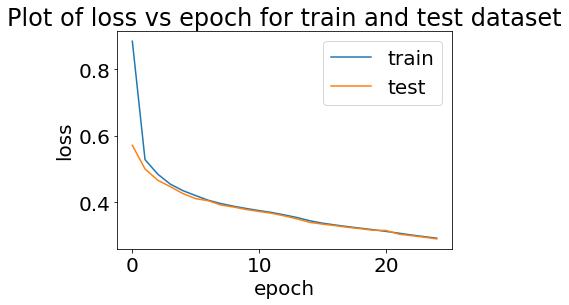

In [35]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
# plt.savefig('plots/mlp_multi_accuracy.png')
plt.show()